##DESAFIO DE DADOS - Ciências de dados em Recursos Humanos

Em um mundo corporativo em constante evolução, a gestão eficaz de recursos humanos é essencial para o sucesso de qualquer organização. No entanto, enfrentar desafios como alta rotatividade de funcionários, custos significativos associados a contratações e desligamentos, além da necessidade de retenção de conhecimento e desenvolvimento de talentos, tornou-se uma realidade cada vez mais comum para muitas empresas.

Para o departamento de Recursos Humanos, essas questões representam não apenas obstáculos, mas também oportunidades para criar soluções inovadoras que impulsionem o crescimento e a sustentabilidade organizacional. Por este motivo nós Ane Caroline Ferreira Ribeiro e Gabriel Vilarinho Cientistas de Dados embarcamos neste desafio para entender as dores da equipe de RH e fornecer soluções para a questão de alta rotatividade de fúncionarios.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pointbiserialr, f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler


In [ ]:
def eda(df:pd.DataFrame)->None:
  print("-"*15,"DataFrame shape", "-"*15 )
  print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")
  print("-"*15,"DataFrame info", "-"*15 )
  print(df.info())
  print("-"*15,"DataFrame isna", "-"*15 )
  print(df.isna().sum())
  print("-"*15,"DataFrame is duplicated", "-"*15 )
  print(df.duplicated().sum())
  print("-"*15,"DataFrame describe numeric", "-"*15 )
  print(df.describe(percentiles=[.01,0.1,.25,.5,.75,.90,.99]))
  print("-"*15,"DataFrame desribe categorical", "-"*15 )
  print(df.describe(exclude=[np.number]))

In [ ]:
df = pd.read_excel('/content/Base_dados - Rotatividade RH.xlsx')

In [ ]:
df.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


Com a função EDA, foi identificado que a única coluna com valores faltantes é a de "Data_Desligamento", que só possui registros quando um funcionário deixou a empresa. Não há informações sobre se o desligamento foi voluntário ou involuntário. Em relação às variáveis categóricas, o nível de cargo mais frequente é o júnior (nível de entrada).

In [ ]:
eda(df)

--------------- DataFrame shape ---------------
Linhas: 650, Colunas: 10
--------------- DataFrame info ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data_Contratacao      650 non-null    datetime64[ns]
 1   Data_Desligamento     144 non-null    datetime64[ns]
 2   Meses_de_Servico      650 non-null    int64         
 3   Idade                 650 non-null    int64         
 4   Pontuacao_Desempenho  650 non-null    float64       
 5   Satisfacao_Trabalho   650 non-null    float64       
 6   Nivel_Cargo           650 non-null    object        
 7   Salario               650 non-null    float64       
 8   Horas_Extras          650 non-null    float64       
 9   Desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ 

Notasse que todas as datas de desligamento estão no dia 2024-05-14, acreditamos que isso se da por conta de um erro na hora que foi importado o dataset

In [ ]:
df['Data_Desligamento'].value_counts()

Data_Desligamento
2024-05-14    144
Name: count, dtype: int64

Felizmente existe as colunas "Data_Contratacao" e "Meses_de_Servico", permitindo que a gente calcule a Data de desligamento para ver se o nosso pensamento inicial se coincide

In [ ]:
df.drop(columns=['Data_Desligamento'])

,Data_Contratacao,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0
...,...,...,...,...,...,...,...,...,...
645,2021-08-28,33,31,2.260088,1.539328,Pleno,7940.88,6.847854,0
646,2022-02-24,27,23,4.611915,2.521799,Junior,4893.95,4.583937,0
647,2022-10-22,19,21,4.688376,4.641638,Junior,3838.70,11.306088,0
648,2021-09-27,32,32,3.551361,3.998147,Pleno,4739.81,4.343341,0


In [ ]:
# Converter a coluna 'Data_Contratacao' para datetime
df['Data_Contratacao'] = pd.to_datetime(df['Data_Contratacao'])

# Criar a coluna 'Data_Desligamento' como NaT inicialmente
df['Data_Desligamento'] = pd.NaT

# Calcular a data de desligamento apenas para os funcionários inativos
df.loc[df['Desligamento'] == 1, 'Data_Desligamento'] = df.loc[df['Desligamento'] == 1].apply(
    lambda row: row['Data_Contratacao'] + pd.DateOffset(months=row['Meses_de_Servico']), axis=1)



Parece que não houve uma mudança significativa em relação ao que era anteriormente, todos os dados ficaram bem próximos do dia 2024-05-14, por conta de só termos os meses trabalhados e não os dias, possívelmente os dias diferentes das novas datas podem ter sido afetadas.

In [ ]:
df['Data_Desligamento'].value_counts()

Data_Desligamento
2024-05-16    19
2024-05-19    15
2024-05-24    14
2024-05-17    11
2024-05-25    10
2024-05-22    10
2024-05-21     9
2024-05-29     9
2024-05-20     9
2024-05-26     8
2024-05-28     8
2024-05-18     5
2024-05-27     5
2024-05-14     4
2024-05-15     4
2024-05-23     4
Name: count, dtype: int64

Por conta disso, iremos manter a coluna de desligamento inicial, para caso seja útil em futuras análises.

####Boxplot para analisar outliers: a única coluna que possui outliers são as horas extras. Mas são poucos casos; neste caso, optamos por não retirar, pois está dentro do contexto. Existem funcionários que fazem mais horas extras do que outros.

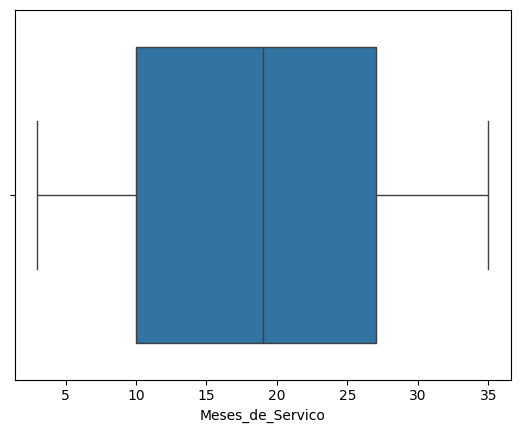

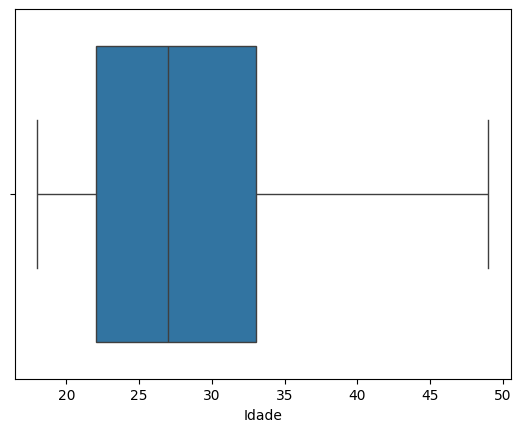

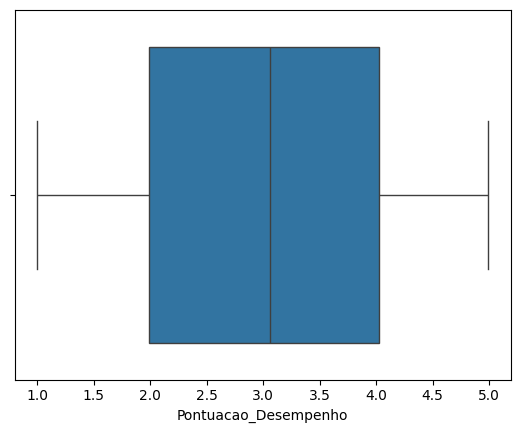

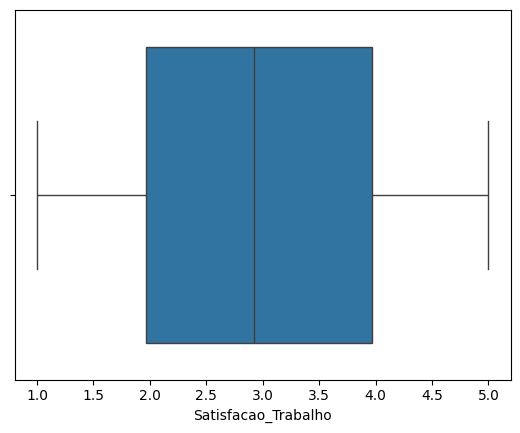

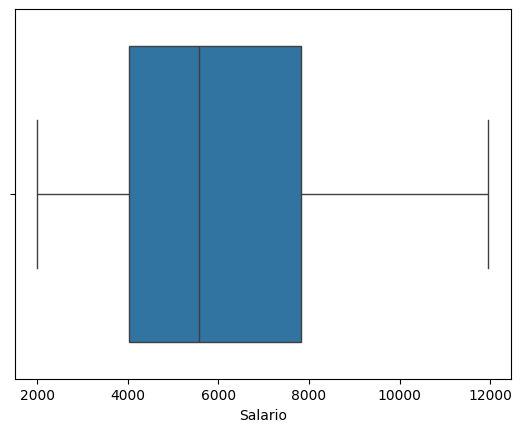

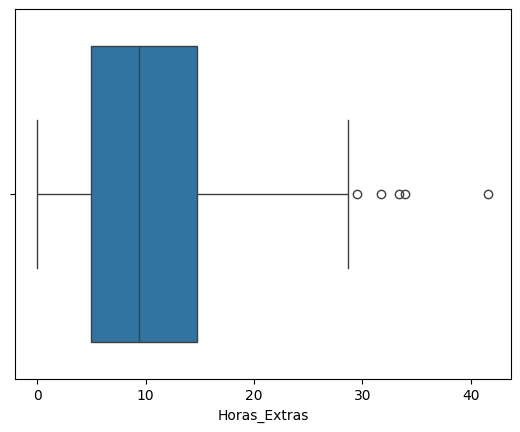

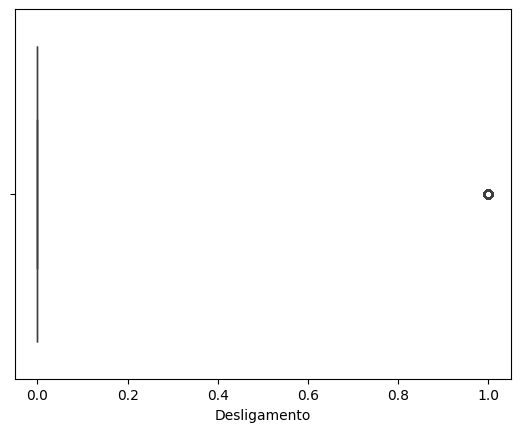

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
  sns.boxplot(data=df, x=col)
  plt.show()

#### Usando o describe, conseguimos ter uma visão mais ampla sobre como está a disposição dos dados da coluna "Hora_Extra", onde foi identificado outliers

In [ ]:
df['Horas_Extras'].describe().T

count    650.000000
mean      10.098864
std        6.242406
min        0.003734
25%        4.978000
50%        9.413546
75%       14.749310
max       41.638350
Name: Horas_Extras, dtype: float64

#### Para identificar e analisar possíveis padrões, adotaremos o método do intervalo interquartil (IQR), que mede a variação entre o terceiro quartil (75%) e o primeiro quartil (25%). Os outliers são valores situados a 1,5 vezes o IQR abaixo do primeiro quartil (limite inferior) ou 1,5 vezes o IQR acima do terceiro quartil (limite superior).

In [ ]:
Q1 = df['Horas_Extras'].quantile(0.25)
Q3 = df['Horas_Extras'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

print("Limite inferior para outliers:", limite_inferior)
print("Limite superior para outliers:", limite_superior)

Limite inferior para outliers: -9.678965604409976
Limite superior para outliers: 29.40627600734996


In [ ]:
df[df['Horas_Extras'] > 29.4]

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
287,2023-12-16,2024-05-14,5,41,3.992896,2.518646,Sênior,11539.90,31.731128,1
396,2021-08-28,2024-05-14,33,32,2.960441,1.472292,Sênior,9580.79,29.495474,1
482,2023-05-20,2024-05-14,12,44,4.535275,2.445485,Sênior,7201.62,33.384582,1
602,2023-05-20,2024-05-14,12,36,2.042353,2.589072,Sênior,10219.58,33.972335,1
631,2023-09-17,2024-05-14,8,32,1.136984,3.885920,Sênior,11854.91,41.638350,1


Identificamos que a maioria dos dados outliers se encontram no nível Sênior, sendo 5 funcionários e todos desligados, com um nível de satisfação, em sua grande maioria, abaixo da média (2.94), será que conseguimos ver uma correlação a partir disso?

Primeiro, vamos analisar se o nível de satisfação tem alguma relação com o número de desligamentos. Para isso, utilizaremos a correlação de ponto bisserial, que nos permite examinar a relação entre duas variáveis: uma contínua (Nível de Satisfação) e outra dicotômica (Desligamento). Essa correlação varia de -1 (associação negativa forte) a 1 (associação positiva forte). Além da correlação, consideraremos o valor p, que nos ajuda a determinar se a diferença ou associação observada entre as variáveis em um estudo é estatisticamente significativa ou se poderia ter ocorrido por acaso.

Seu significado é:

 - Valor p baixo: Sugere que a probabilidade de obter o resultado observado, se a hipótese nula for verdadeira, é baixa. Isso nos leva a rejeitar a hipótese nula em favor da hipótese alternativa.

 - Valor p alto: Sugere que a probabilidade de obter o resultado observado, se a hipótese nula for verdadeira, é alta. Isso nos leva a não rejeitar a hipótese nula.

In [ ]:
correlacao_desligamento_satisfacao = pointbiserialr(df['Desligamento'], df['Satisfacao_Trabalho'])
print(f"""
 Correlação de Ponto Bisserial entre Desligamento e Satisfação:

 Correlação: {correlacao_desligamento_satisfacao[0]}
 Valor do p: {correlacao_desligamento_satisfacao[1]}

      """)


 Correlação de Ponto Bisserial entre Desligamento e Satisfação:

 Correlação: -0.02569267160029243
 Valor do p: 0.5131863428975251

      


Ao analisar os resultados, observamos uma associação muito fraca entre as duas variáveis. No entanto, não temos evidências suficientes para rejeitar a hipótese nula de que não há correlação significativa entre elas. Isso sugere que a associação observada pode ser atribuída ao acaso e não é estatisticamente significativa. Podemos ver essa baixa correlação nos gráficos gerados abaixo.

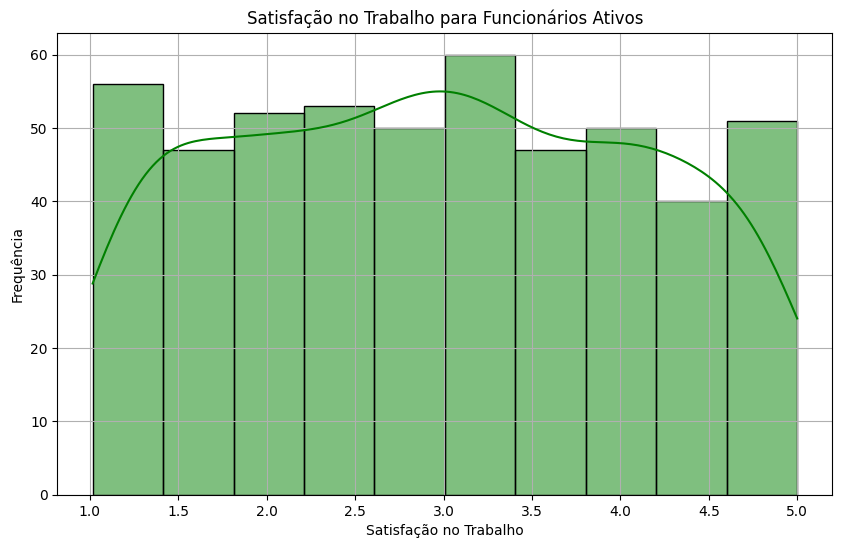

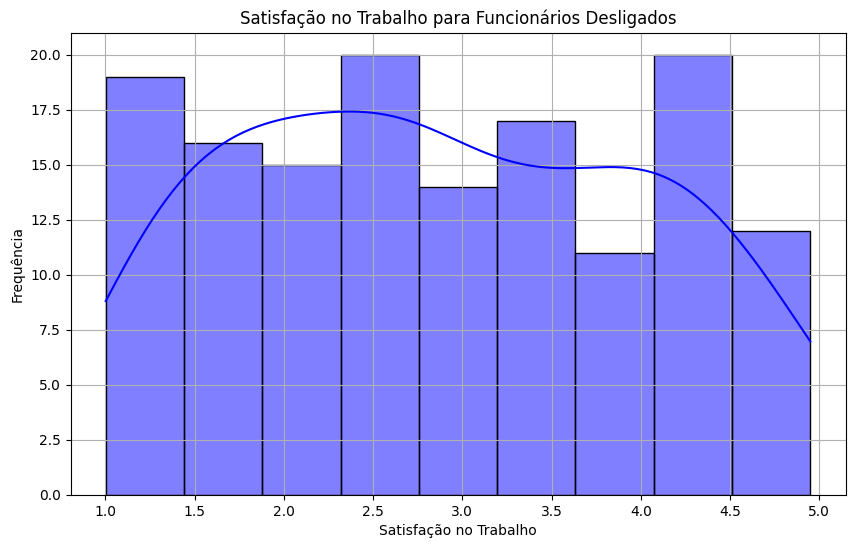

In [ ]:
satisfacao = df[['Desligamento', 'Satisfacao_Trabalho']]

# Criar histograma 1 (Desligamento = 0)
plt.figure(figsize=(10, 6))
sns.histplot(data=satisfacao[satisfacao['Desligamento'] == 0], x='Satisfacao_Trabalho', kde=True, color='green')
plt.title('Satisfação no Trabalho para Funcionários Ativos')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar histograma 2 (Desligamento = 1)
plt.figure(figsize=(10, 6))
sns.histplot(data=satisfacao[satisfacao['Desligamento'] == 1], x='Satisfacao_Trabalho', kde=True, color='blue')
plt.title('Satisfação no Trabalho para Funcionários Desligados')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()



#### Analisando os gráficos plotados notamos uma caracteristica bem parecida tanto para pessoas ativas e inativas. Pensando que anteriormente notamos uma tendência para os funcionários nivel Sênior, vamos montar um gráfico comparando cada nível para vermos uma possível relação

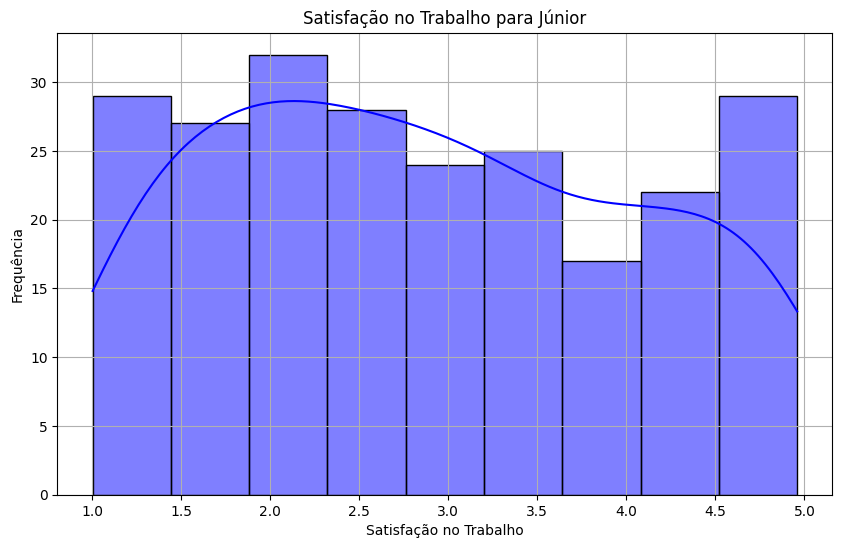

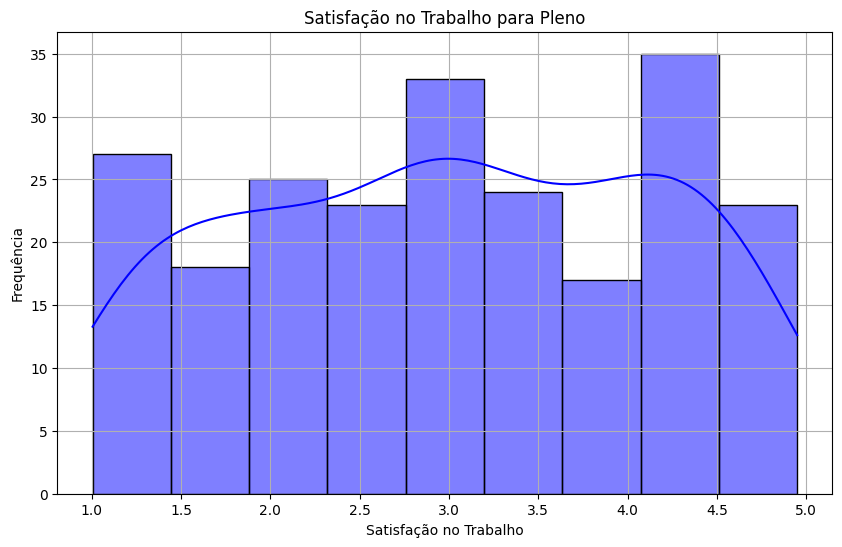

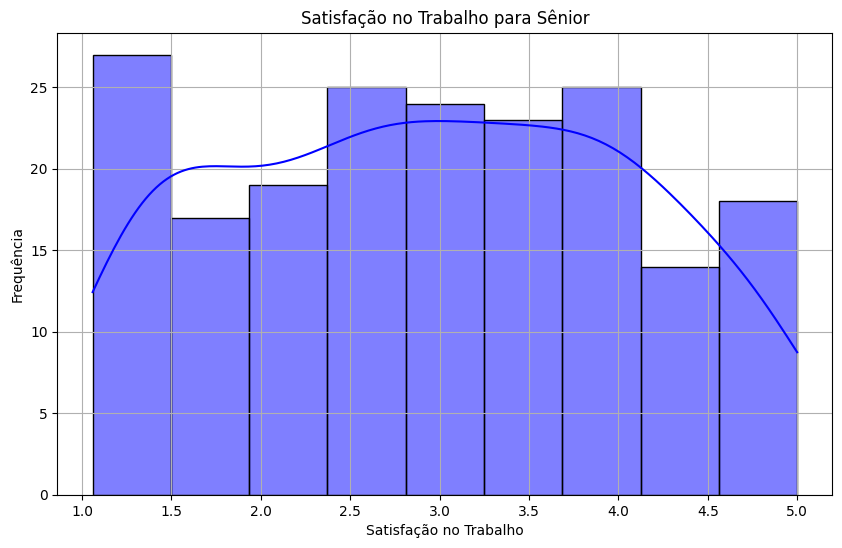

In [ ]:
# Criar uma figura para o histograma de nível Júnior
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Nivel_Cargo'] == 'Junior'], x='Satisfacao_Trabalho', kde=True, color='blue')
plt.title('Satisfação no Trabalho para Júnior')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar uma figura para o histograma de nível Pleno
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Nivel_Cargo'] == 'Pleno'], x='Satisfacao_Trabalho', kde=True, color='blue')
plt.title('Satisfação no Trabalho para Pleno')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar uma figura para o histograma de nível Sênior
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Nivel_Cargo'] == 'Sênior'], x='Satisfacao_Trabalho', kde=True, color='blue')
plt.title('Satisfação no Trabalho para Sênior')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

#### Observa-se um aumento na insatisfação no trabalho para os funcionários de nível Júnior, enquanto há uma situação intermediária para os funcionários de nível Sênior. Vamos examinar a distribuição da quantidade de funcionários desligados conforme o nível de cargo.

In [ ]:
df.groupby('Nivel_Cargo')['Desligamento'].agg(["sum","count", "mean"])

,sum,count,mean
Nivel_Cargo,,,
Junior,56,233,0.240343
Pleno,45,225,0.200000
Sênior,43,192,0.223958


<Axes: xlabel='Nivel_Cargo', ylabel='Count'>

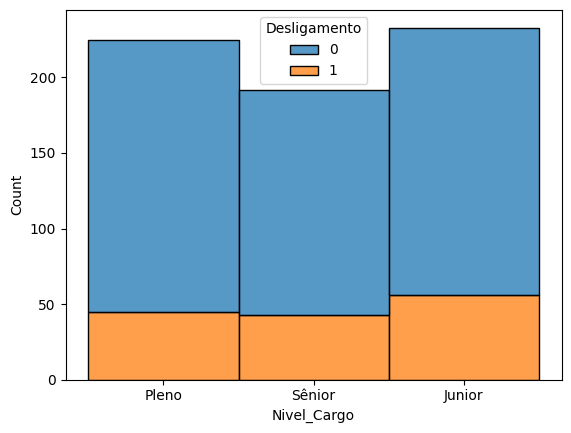

In [ ]:
sns.histplot(data=df, x="Nivel_Cargo",hue="Desligamento", multiple="stack")

##Estudo de correlações

Heatmap (Mapa de Calor) é uma representação gráfica de uma matriz onde os valores são representados por cores.Na análise de dados é frequentemente usado para visualizar a matriz de correlação entre as variáveis ​​de um conjunto de dados. Por usar a correlação de Pearson como padrão só aceita colunas númerica, mais abaixo usamos uma função para mostrar a correlação das váriaveis categóricas com as demais númericas.
   


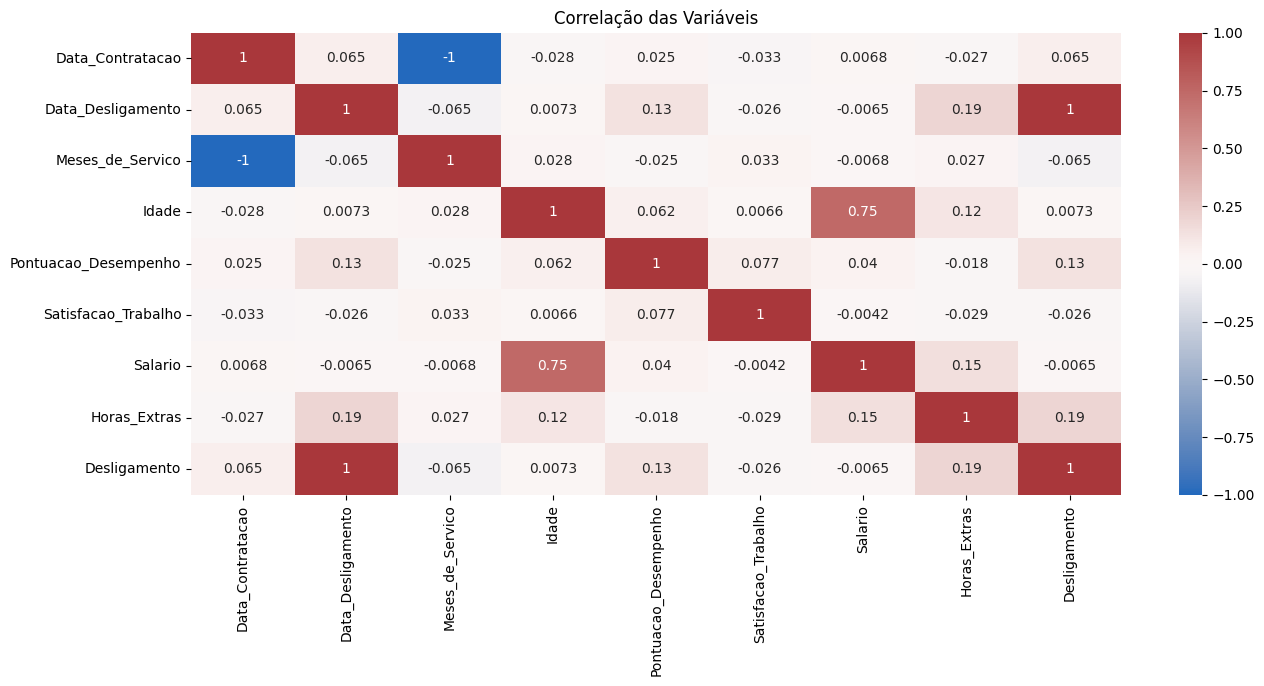

In [ ]:
var_num=df.describe().columns.tolist()
plt.figure(figsize=(15,6))
sns.heatmap(data=df[var_num].corr(), annot=True, cmap="vlag")
plt.title("Correlação das Variáveis")
plt.show()


Pairplot (Gráfico de Pares)  é uma visualização que mostra as relações bivariadas entre pares de variáveis em um conjunto de dados.Cria uma matriz de dispersão de pares de variáveis, onde cada gráfico de dispersão mostra a relação entre duas variáveis.O pairplot é útil para identificar padrões, tendências e relações entre as variáveis do conjunto de dados.


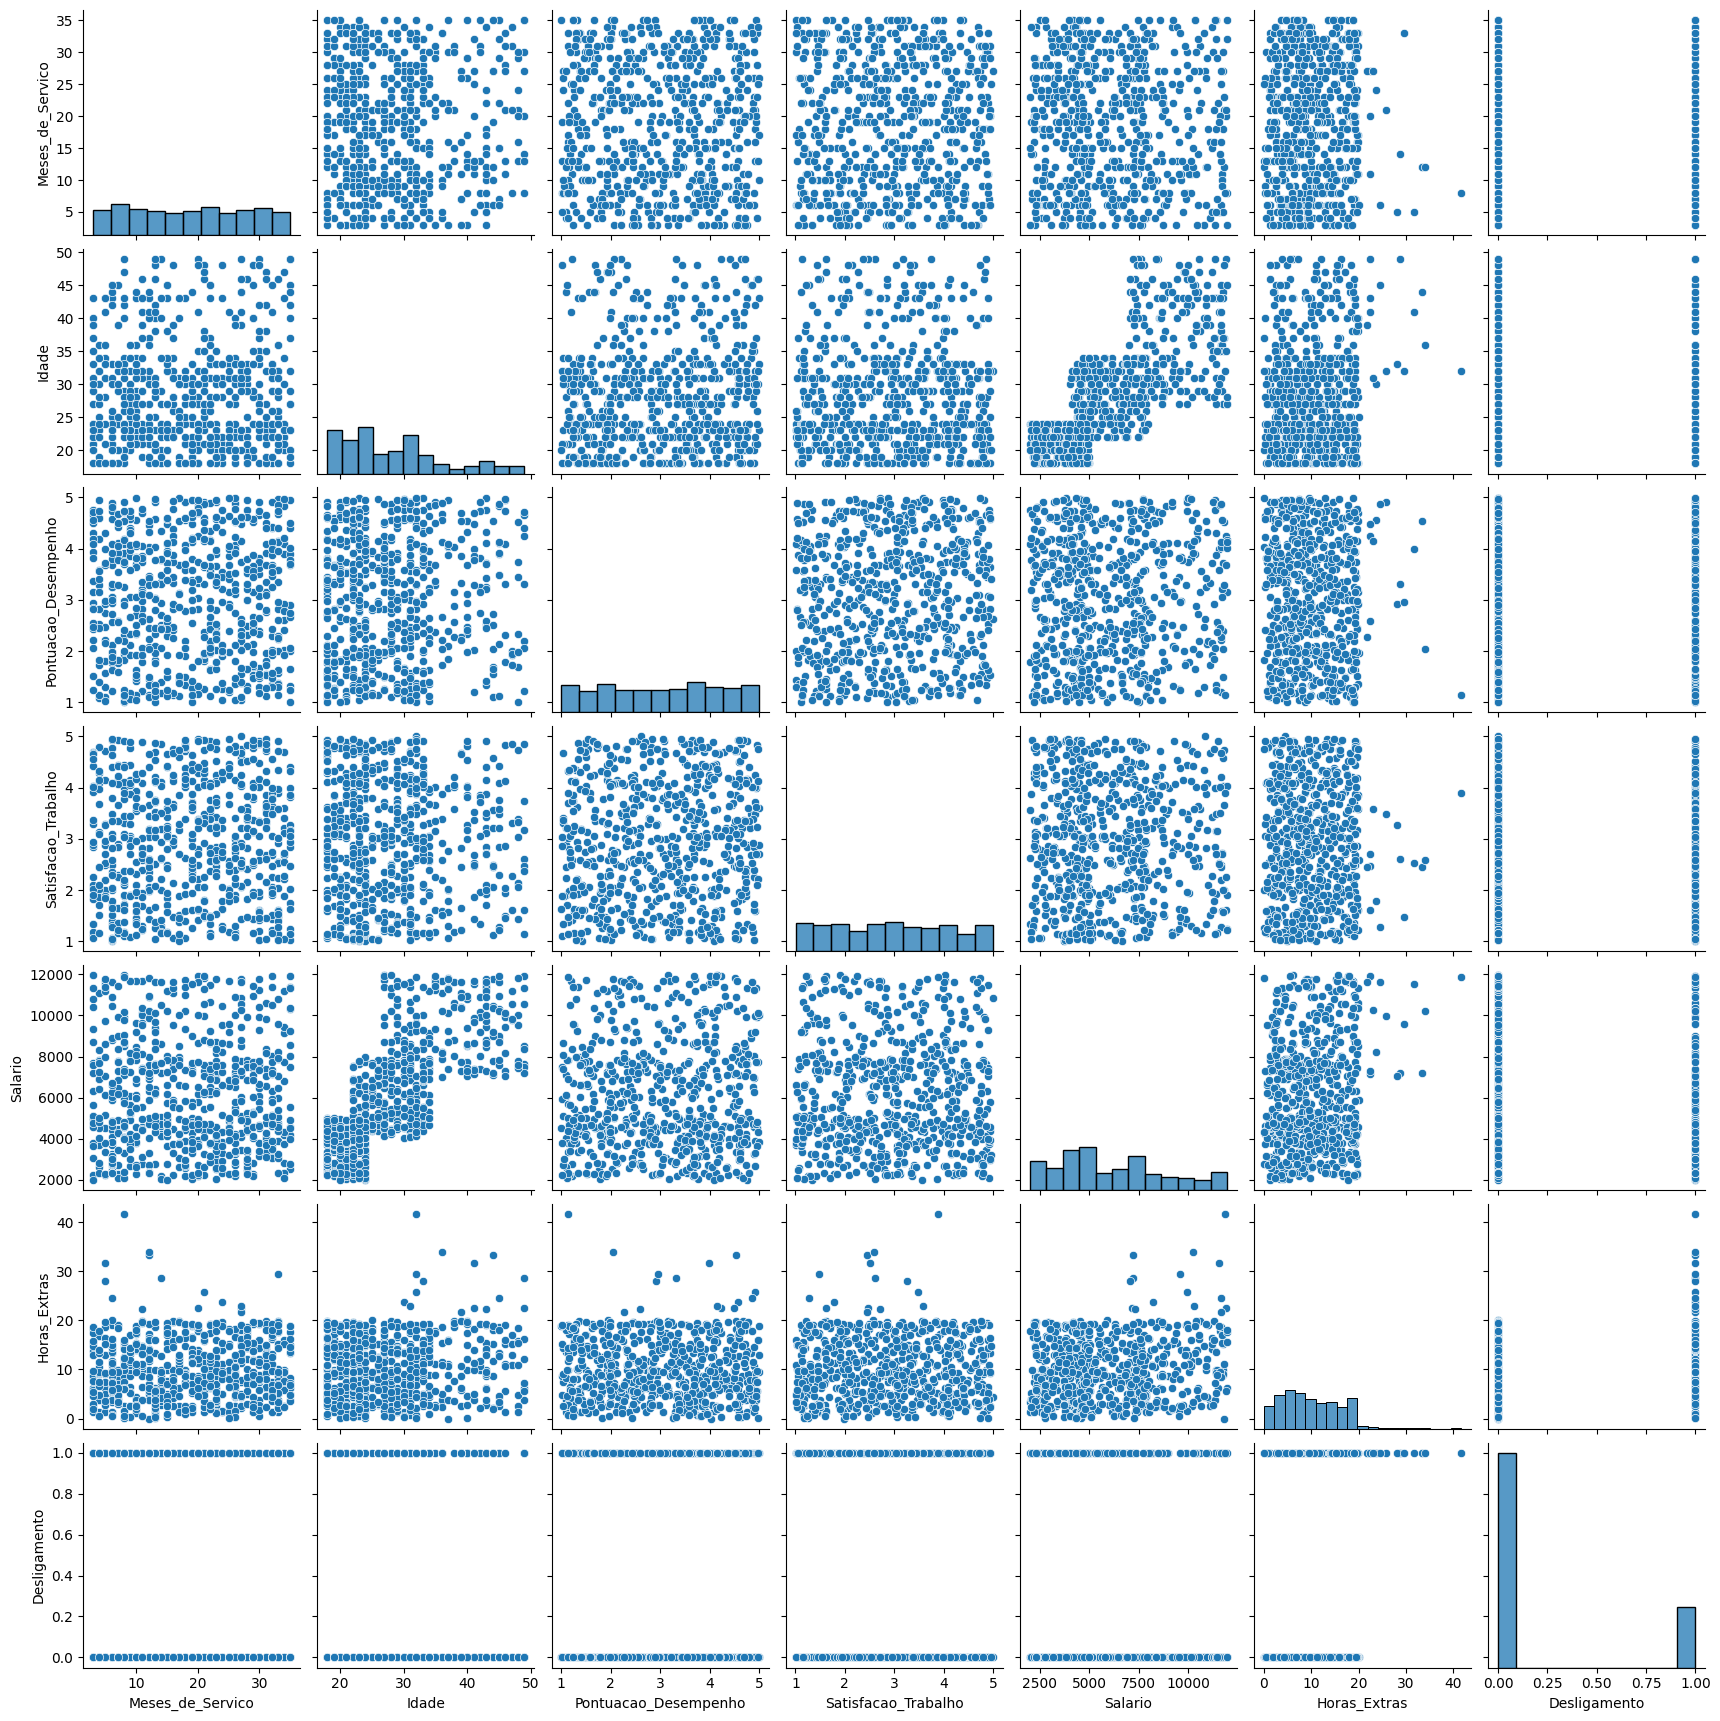

In [ ]:
sns.pairplot(df)

#### Vamos explorar as relações entre as variáveis do dataset e os níveis de cargos usando correlação Bisserial. Isso nos ajudará a entender as associações entre idade, desempenho, satisfação no trabalho, salário, horas extras e a probabilidade de desligamento com os diferentes níveis hierárquicos.

In [ ]:
def biserial_correlation(df, categorical_variable, category, numeric_variable):
    # Filtrar os dados para a categoria específica
    df_category = df[df[categorical_variable] == category]

    # Calcular a média das variáveis numéricas para a categoria específica
    mean_category = df_category[numeric_variable].mean()

    # Calcular a média global das variáveis numéricas
    global_mean = df[numeric_variable].mean()

    # Calcular o desvio padrão global das variáveis numéricas
    global_std = df[numeric_variable].std()

    # Calcular a proporção da categoria
    prop_category = len(df_category) / len(df)

    # Calcular a correlação bisserial
    biserial_corr = (mean_category - global_mean) / global_std * np.sqrt(prop_category * (1 - prop_category))

    return biserial_corr

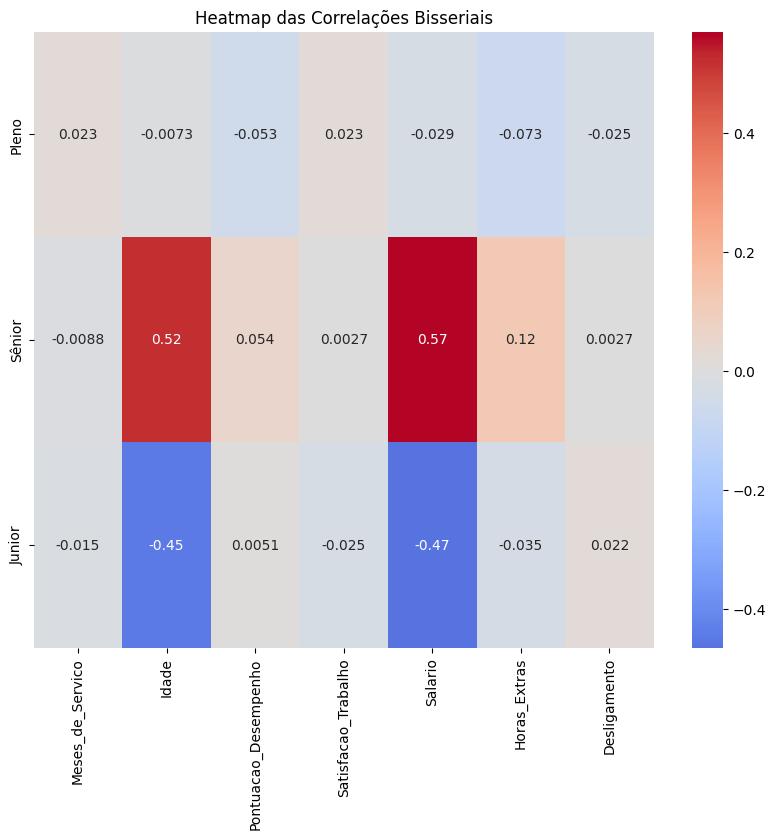

In [ ]:
categorical_var = 'Nivel_Cargo'
numeric_vars = df.select_dtypes(include=[np.number]).columns
correlation_matrix = pd.DataFrame(index=df[categorical_var].unique(), columns=numeric_vars)

for category in df[categorical_var].unique():
    for numeric_var in numeric_vars:
        correlation = biserial_correlation(df, categorical_var, category, numeric_var)
        correlation_matrix.at[category, numeric_var] = correlation

# Converter os valores para tipo float (para garantir que o heatmap funcione corretamente)
correlation_matrix = correlation_matrix.astype(float)

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap das Correlações Bisseriais')
plt.show()

### **Relações Fortes (Previsíveis)**

- **Idade x Nível do Cargo:** Espera-se uma associação forte entre idade e nível do cargo, já que geralmente os cargos mais altos são ocupados por funcionários mais experientes.

- **Salário x Nível do Cargo:** É natural esperar uma forte relação entre salário e nível do cargo, pois geralmente os cargos mais altos têm salários mais elevados.

### **Relações Moderadas**

- **Pontuação de Desempenho:** Observa-se uma correlação moderada e positiva, com alta significância estatística. Esta relação sugere que um desempenho melhor tende a estar associado a outros fatores ou características.

- **Horas Extras:** Também é observada uma correlação moderada e positiva, com significância estatística muito alta. Isso indica que o número de horas extras trabalhadas está correlacionado positivamente com outras variáveis ou comportamentos.

### Portanto, vamos explorar um pouco mais essas relações moderada


In [ ]:
var_num = df.describe().columns.tolist()
var_num.remove('Data_Contratacao')
var_num.remove('Data_Desligamento')
var_num.remove('Desligamento')

# o pointbiserialr já calcula automaticamente a correlação Bisserial
for coluna in var_num:
  correlacao_desligamento_variaveis = pointbiserialr(df['Desligamento'], df[coluna])

  print(f"""
  Correlação de Ponto Bisserial entre Desligamento e {coluna}:

  Correlação: {correlacao_desligamento_variaveis[0]}
  Valor do p: {correlacao_desligamento_variaveis[1]}
    """)


  Correlação de Ponto Bisserial entre Desligamento e Meses_de_Servico:  

  Correlação: -0.06471027748355501
  Valor do p: 0.09928143195446024
    

  Correlação de Ponto Bisserial entre Desligamento e Idade:  

  Correlação: 0.007267293382132631
  Valor do p: 0.8532869429166803
    

  Correlação de Ponto Bisserial entre Desligamento e Pontuacao_Desempenho:  

  Correlação: 0.13182654768611288
  Valor do p: 0.0007539326810697084
    

  Correlação de Ponto Bisserial entre Desligamento e Satisfacao_Trabalho:  

  Correlação: -0.02569267160029243
  Valor do p: 0.5131863428975251
    

  Correlação de Ponto Bisserial entre Desligamento e Salario:  

  Correlação: -0.006517655017015803
  Valor do p: 0.8682748591724911
    

  Correlação de Ponto Bisserial entre Desligamento e Horas_Extras:  

  Correlação: 0.1906570124348036
  Valor do p: 9.758512610913715e-07
    


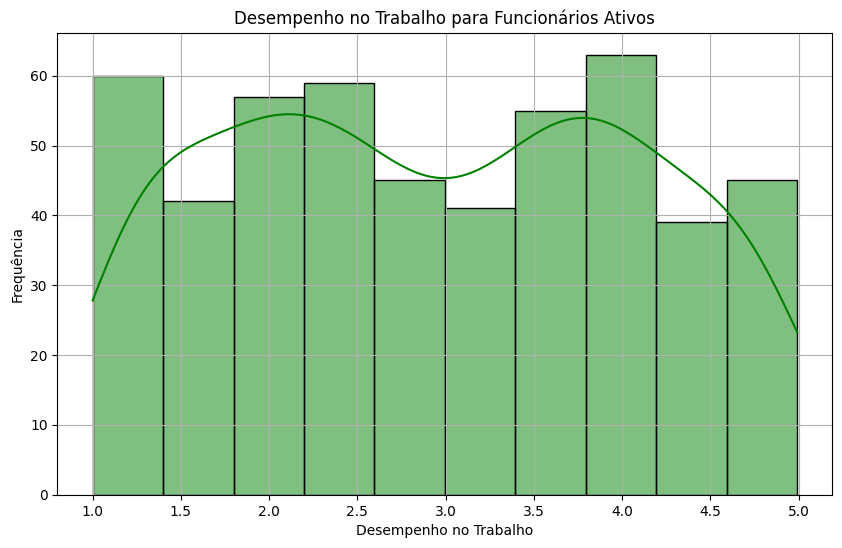

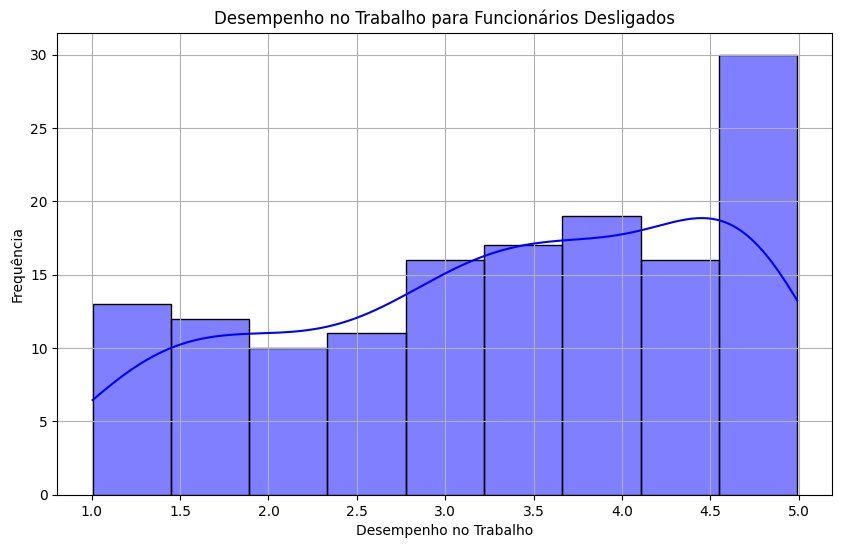

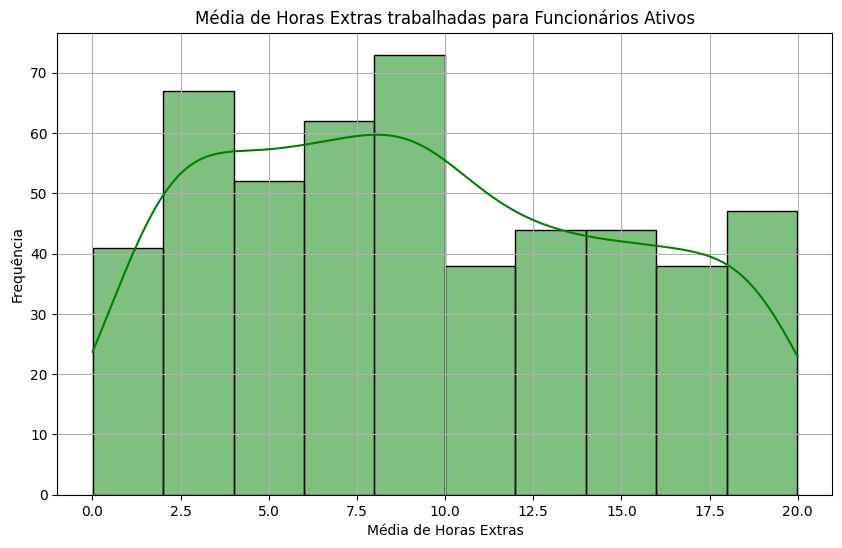

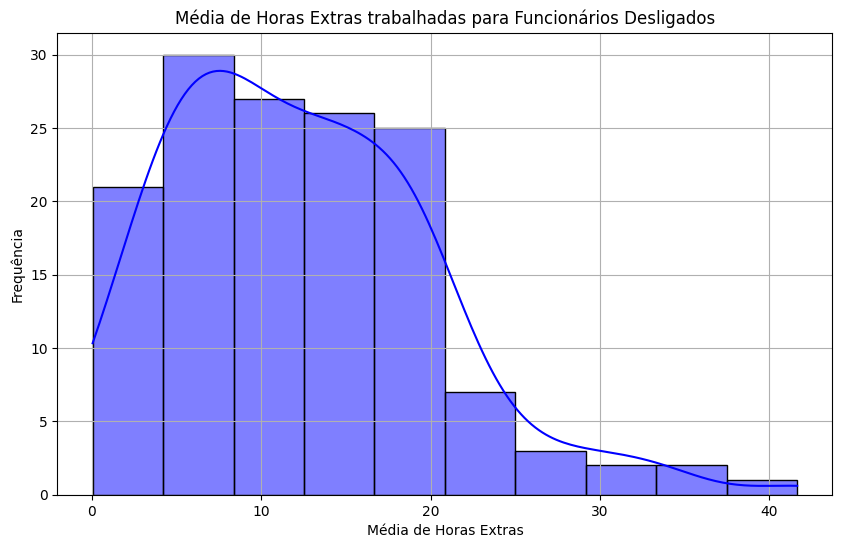

In [ ]:
pontuacao = df[['Desligamento', 'Pontuacao_Desempenho']]
horas_extras = df[['Desligamento', 'Horas_Extras']]

# Criar histograma 1 (Desligamento = 0)
plt.figure(figsize=(10, 6))
sns.histplot(data=pontuacao[pontuacao['Desligamento'] == 0], x='Pontuacao_Desempenho', kde=True, color='green')
plt.title('Desempenho no Trabalho para Funcionários Ativos')
plt.xlabel('Desempenho no Trabalho')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar histograma 2 (Desligamento = 1)
plt.figure(figsize=(10, 6))
sns.histplot(data=pontuacao[pontuacao['Desligamento'] == 1], x='Pontuacao_Desempenho', kde=True, color='blue')
plt.title('Desempenho no Trabalho para Funcionários Desligados')
plt.xlabel('Desempenho no Trabalho')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


# Criar histograma 1 (Desligamento = 0)
plt.figure(figsize=(10, 6))
sns.histplot(data=horas_extras[horas_extras['Desligamento'] == 0], x='Horas_Extras', kde=True, color='green')
plt.title('Média de Horas Extras trabalhadas para Funcionários Ativos')
plt.xlabel('Média de Horas Extras')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar histograma 2 (Desligamento = 1)
plt.figure(figsize=(10, 6))
sns.histplot(data=horas_extras[horas_extras['Desligamento'] == 1], x='Horas_Extras', kde=True, color='blue')
plt.title('Média de Horas Extras trabalhadas para Funcionários Desligados')
plt.xlabel('Média de Horas Extras')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()





#### Direcionando nossa atenção para os funcionários desligados, vamos inicialmente analisar a relação com as horas extras. Frequentemente, devido à má gestão do tempo ou à sobrecarga de trabalho, o número de horas extras pode aumentar. Como observado no gráfico anterior, há um aumento significativo no número de horas extras, inclusive ultrapassando as 20 horas, que é o máximo observado para os funcionários ainda ativos.

In [ ]:
# Separando os funcionários por ativo e inativo
ativos = df[df['Desligamento'] == 0].drop(columns=['Desligamento', 'Data_Desligamento', 'Data_Contratacao'])
inativos = df[df['Desligamento'] == 1].drop(columns=['Desligamento', 'Data_Desligamento', 'Data_Contratacao'])

inativos

,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras
1,6,43,3.256257,1.711719,Sênior,8798.34,19.036627
5,24,43,4.328231,3.209761,Sênior,10466.00,13.933565
7,9,30,1.086755,1.908626,Pleno,6058.88,13.626713
12,26,28,2.733115,1.820046,Pleno,7252.12,6.230965
20,19,27,4.123725,4.465835,Pleno,7359.37,2.489000
...,...,...,...,...,...,...,...
634,33,24,3.942960,1.273013,Junior,4561.45,19.068107
639,6,23,3.000086,4.095554,Junior,2313.07,5.863529
640,25,32,4.986163,4.746069,Pleno,4353.67,0.089801
642,20,23,4.721714,3.340184,Pleno,4709.75,19.098905


##### Para investigar a possível relação entre Horas Extras e todas as possíveis features, utilizaremos a Correlação de Pearson. Essa medida estatística nos permite avaliar a força e a direção da relação linear entre essas duas variáveis.

In [ ]:
var_num = inativos.describe().columns.tolist()
var_num.remove('Horas_Extras')


for coluna in var_num:
  corr_pearson_inativos = inativos['Horas_Extras'].corr(inativos[coluna])

  print(f"""
  Correlação de Pearson entre Horas Extras e {coluna}:

  Correlação: {corr_pearson_inativos}
    """)


  Correlação de Pearson entre Horas Extras e Meses_de_Servico:

  Correlação: 0.007129929955240456
    

  Correlação de Pearson entre Horas Extras e Idade:

  Correlação: 0.4406445402537965
    

  Correlação de Pearson entre Horas Extras e Pontuacao_Desempenho:

  Correlação: -0.03583572937464419
    

  Correlação de Pearson entre Horas Extras e Satisfacao_Trabalho:

  Correlação: -0.11863149349387934
    

  Correlação de Pearson entre Horas Extras e Salario:

  Correlação: 0.5216568914480288
    


Ao analisarmos as correlações entre as horas extras e outras variáveis, observamos o seguinte:

**Correlações muito fracas (praticamente nulas):**

- Meses de Serviço: Indicando uma relação quase inexistente entre o tempo de serviço e as horas extras.
- Pontuação de Desempenho: Demonstrando uma relação mínima entre a pontuação de desempenho e o número de horas extras trabalhadas.

**Correlações fracas:**

- Satisfação no Trabalho: Indicando que os funcionários que trabalham mais horas extras tendem a ter uma satisfação no trabalho ligeiramente menor.

**Correlações moderadas:**

- Idade: Sugere que funcionários mais velhos tendem a trabalhar mais horas extras.
- Salário: Indicando que funcionários com salários mais altos tendem a trabalhar mais horas extras.

Essas observações nos ajudam a compreender melhor a relação entre as horas extras e outras características dos funcionários.

#### Para investigar a possível relação entre Pontuação de Desempenho e todas as possíveis features, utilizaremos novamente a Correlação de Pearson.

In [ ]:
var_num = inativos.describe().columns.tolist()
var_num.remove('Pontuacao_Desempenho')

for coluna in var_num:
  corr_pearson_inativos = inativos['Pontuacao_Desempenho'].corr(inativos[coluna])

  print(f"""
  Correlação de Pearson entre Pontuação de Desempenho e {coluna}:

  Correlação: {corr_pearson_inativos}
    """)


  Correlação de Pearson entre Pontuação de Desempenho e Meses_de_Servico:

  Correlação: 0.0881118355474368
    

  Correlação de Pearson entre Pontuação de Desempenho e Idade:

  Correlação: 0.19594891958535873
    

  Correlação de Pearson entre Pontuação de Desempenho e Satisfacao_Trabalho:

  Correlação: 0.10772083921550571
    

  Correlação de Pearson entre Pontuação de Desempenho e Salario:

  Correlação: 0.06386373024246961
    

  Correlação de Pearson entre Pontuação de Desempenho e Horas_Extras:

  Correlação: -0.03583572937464419
    


Ao analisarmos as correlações entre a Pontuação de Desempenho e outras variáveis, observamos o seguinte:

**Correlações muito fracas (quase nulas):**

- Meses de Serviço: Indicando uma relação quase inexistente entre o tempo de serviço e a pontuação de desempenho.
- Horas Extras: Demonstrando uma relação mínima entre o número de horas extras trabalhadas e a pontuação de desempenho.

**Correlações fracas:**

- Satisfação no Trabalho: Indicando que funcionários com uma pontuação de desempenho mais alta tendem a ter uma satisfação no trabalho ligeiramente menor.

**Correlações moderadas:**

- Idade: Sugere que funcionários mais velhos tendem a ter uma pontuação de desempenho um pouco mais alta.

- Salário: Indicando que funcionários com salários mais altos tendem a ter uma pontuação de desempenho um pouco mais alta.

#### Analisando o gráfico de horas extras, foi notado que vários funcionários trabalhavam mais horas que a média dos demais, vamos analisa-los para vermos se conseguimos extrair mais informações

In [ ]:
# O máximo de horas extras trabalhadas entre os funcionários ativos foi de 19.98 horas, arredondando para 20 horas
print(ativos['Horas_Extras'].max())

# Quase 10% dos funcionários desligados trabalhavam mais do que o máximo de horas extras dos ativos
print(inativos['Horas_Extras'].quantile(0.90))

# Visto isso, vamos analisar os funcionários com mais de 20h inativos

19.98416000376088
21.21573716722234


In [ ]:
maiores_horas_extras = inativos[inativos['Horas_Extras'] > 20]
maiores_horas_extras

,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras
42,20,49,4.235481,1.614330,Sênior,11917.59,22.489000
67,24,30,4.565257,1.785497,Sênior,8233.47,23.733500
101,27,41,4.484410,2.465166,Sênior,7157.90,22.489000
120,14,49,3.316045,2.606602,Sênior,7219.51,28.711500
287,5,41,3.992896,2.518646,Sênior,11539.90,31.731128
321,21,32,4.910071,3.490262,Sênior,9958.86,25.860457
327,27,39,2.275669,2.442539,Sênior,11650.04,21.755625
342,6,45,4.860358,1.273171,Sênior,11647.37,24.453148
374,5,33,2.918829,3.262444,Sênior,7045.68,28.103221
396,33,32,2.960441,1.472292,Sênior,9580.79,29.495474


In [ ]:
var_num = maiores_horas_extras.describe().columns.tolist()
var_num.remove('Horas_Extras')

for coluna in var_num:
  corr_pearson_top_horas_extras = maiores_horas_extras['Horas_Extras'].corr(maiores_horas_extras[coluna])

  print(f"""
  Correlação de Pearson dos funcionários com maiores Horas extra e {coluna}:

  Correlação: {corr_pearson_top_horas_extras}
    """)


  Correlação de Pearson dos funcionários com maiores Horas extra e Meses_de_Servico:

  Correlação: -0.47672790911437046
    

  Correlação de Pearson dos funcionários com maiores Horas extra e Idade:

  Correlação: -0.19345708265521624
    

  Correlação de Pearson dos funcionários com maiores Horas extra e Pontuacao_Desempenho:

  Correlação: -0.5016698393529436
    

  Correlação de Pearson dos funcionários com maiores Horas extra e Satisfacao_Trabalho:

  Correlação: 0.3546171365054256
    

  Correlação de Pearson dos funcionários com maiores Horas extra e Salario:

  Correlação: 0.1358880985298396
    


## **Análise de Correlações entre Horas Extras e Outras Variáveis**

**Correlações Gerais entre Funcionários Inativos (Pegando todos os funcionários inativos)**


- Meses de Serviço: Correlação de 0.0071, indicando uma relação quase inexistente entre o tempo de serviço e as horas extras.

- Idade: Correlação de 0.4406, sugerindo que funcionários mais velhos tendem a trabalhar mais horas extras.

- Pontuação de Desempenho: Correlação de -0.0358, demonstrando uma relação mínima entre a pontuação de desempenho e o número de horas extras trabalhadas.

- Satisfação no Trabalho: Correlação de -0.1186, indicando que funcionários que trabalham mais horas extras tendem a ter uma satisfação no trabalho ligeiramente menor.

- Salário: Correlação de 0.5217, sugerindo que funcionários com salários mais altos tendem a trabalhar mais horas extras.

\
### **Correlações entre Funcionários com Muitas Horas Extras**

Ao focar somente nos funcionários que trabalham muitas horas extras, observamos as seguintes correlações:

- Meses de Serviço: Correlação de -0.4767, indicando que entre os funcionários que trabalham muitas horas extras, aqueles que têm mais tempo de serviço tendem a trabalhar menos horas extras.

- Idade: Correlação de -0.1935, sugerindo que funcionários mais velhos tendem a trabalhar menos horas extras entre os que têm muitas horas extras.

- Pontuação de Desempenho: Correlação de -0.5017, mostrando que funcionários com melhor pontuação de desempenho tendem a trabalhar menos horas extras.

- Satisfação no Trabalho: Correlação de 0.3546, indicando uma relação positiva onde funcionários que trabalham muitas horas extras tendem a ter uma satisfação no trabalho ligeiramente maior.

- Salário: Correlação de 0.1359, sugerindo que funcionários com salários mais altos tendem a trabalhar mais horas extras.

\
### **Correlações Gerais (Todos os funcionários inativos)**

- Idade: A correlação moderada sugere que funcionários mais velhos, em geral, tendem a trabalhar mais horas extras.

- Salário: A correlação moderada indica que funcionários com salários mais altos geralmente trabalham mais horas extras.

- Pontuação de Desempenho e Satisfação no Trabalho: As correlações muito fracas mostram que não há uma relação significativa entre horas extras e essas variáveis, o que pode indicar que outros fatores são mais determinantes para a pontuação de desempenho e a satisfação no trabalho.

\
### **Funcionários com Muitas Horas Extras**

- Meses de Serviço e Idade: As correlações negativas indicam que entre os funcionários que trabalham muitas horas extras, aqueles com mais tempo de serviço ou que são mais velhos tendem a trabalhar menos horas extras.

- Pontuação de Desempenho: A forte correlação negativa sugere que funcionários com melhor pontuação de desempenho tendem a trabalhar menos horas extras.

- Satisfação no Trabalho: A correlação positiva indica que alguns funcionários que trabalham muitas horas extras ainda mantêm uma satisfação no trabalho, possivelmente devido a incentivos ou outras recompensas.

- Salário: A correlação positiva sugere que entre os que trabalham muitas horas extras, os que recebem salários mais altos tendem a fazer mais horas extras.


## **Conclusão**

Essas observações revelam nuances interessantes sobre os funcionários que trabalham muitas horas extras. As correlações indicam que fatores como salário e satisfação no trabalho têm um papel significativo, enquanto o tempo de serviço e a pontuação de desempenho apresentam relações mais complexas. Essas análises podem ser úteis para identificar áreas de melhoria na gestão de horas extras e compreender melhor as dinâmicas que levam ao desligamento de funcionários.







### Tempo de Serviço dos Funcionários
Foi observada uma relação complexa entre o tempo de serviço dos funcionários e outras variáveis. Para entender melhor essa dinâmica, vamos explorar mais detalhadamente os funcionários com maior tempo de casa, especificamente aqueles com mais de 2 anos de serviço.

In [ ]:
maiorTempoCasa = df[df['Meses_de_Servico']>24]
maiorTempoCasa.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
6,2022-03-26,NaT,26,23,4.061082,1.911483,Pleno,5476.96,12.706278,0
8,2022-02-24,NaT,27,44,1.549005,2.067783,Sênior,7780.41,2.078029,0
9,2022-02-24,NaT,27,44,2.042515,4.588230,Sênior,11756.99,15.148751,0
12,2022-03-26,2024-05-14,26,28,2.733115,1.820046,Pleno,7252.12,6.230965,1
13,2022-02-24,NaT,27,22,2.300472,4.747379,Junior,4938.58,7.467000,0


In [ ]:
maiorTempoCasa.describe()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Desligamento
count,213,38,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,2021-11-26 10:08:27.042253568,2024-05-14 00:00:00,29.985915,28.652582,2.990998,2.955183,6104.190094,10.291913,0.178404
min,2021-06-29 00:00:00,2024-05-14 00:00:00,25.000000,18.000000,1.000242,1.015440,2081.240000,0.089801,0.000000
25%,2021-08-28 00:00:00,2024-05-14 00:00:00,27.000000,22.000000,1.981112,2.001191,4142.510000,5.747579,0.000000
50%,2021-11-26 00:00:00,2024-05-14 00:00:00,30.000000,27.000000,2.993552,2.926817,5284.120000,9.547046,0.000000
75%,2022-02-24 00:00:00,2024-05-14 00:00:00,33.000000,33.000000,3.987345,3.862489,7727.600000,15.038018,0.000000
max,2022-04-25 00:00:00,2024-05-14 00:00:00,35.000000,49.000000,4.989745,4.999415,11932.740000,29.495474,1.000000
std,NaN,NaN,3.059903,8.265720,1.182193,1.168236,2614.022951,5.770522,0.383754


In [ ]:
maiorTempoCasa['Desligamento'].value_counts()

Desligamento
0    175
1     38
Name: count, dtype: int64

In [ ]:
maiorTempoCasa['Desligamento'].value_counts(normalize=True)

Desligamento
0    0.821596
1    0.178404
Name: proportion, dtype: float64

In [ ]:
maiorTempoCasa.groupby(['Desligamento']).agg(Quantidade_Funcionarios=('Nivel_Cargo','value_counts'))

Quantidade_Funcionarios
Desligamento Nivel_Cargo                         
0            Pleno                             67
             Junior                            61
             Sênior                            47
1            Junior                            13
             Sênior                            13
             Pleno                             12

In [ ]:
maiorTempoCasa.groupby(['Desligamento','Nivel_Cargo']).agg({'Pontuacao_Desempenho':'mean', 'Satisfacao_Trabalho':'mean', 'Horas_Extras':'mean', 'Salario':'mean'})

Pontuacao_Desempenho  Satisfacao_Trabalho  \
Desligamento Nivel_Cargo                                              
0            Junior                   2.802680             2.952816   
             Pleno                    2.850348             2.841883   
             Sênior                   3.073809             3.124162   
1            Junior                   3.133730             2.950955   
             Pleno                    3.711783             3.226520   
             Sênior                   3.492068             2.693055   

                          Horas_Extras      Salario  
Desligamento Nivel_Cargo                             
0            Junior           9.908334  3518.675738  
             Pleno            9.546496  5931.283881  
             Sênior          10.146099  9455.633404  
1            Junior          12.123784  3937.357692  
             Pleno            6.056514  5754.285000  
             Sênior          18.538448  9500.416154

<Axes: xlabel='Meses_de_Servico', ylabel='Salario'>

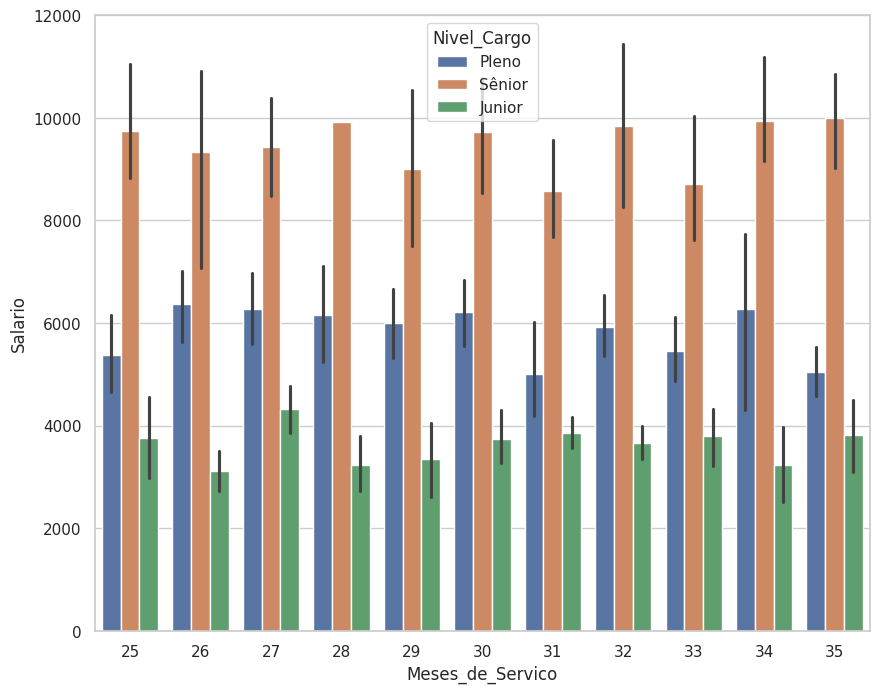

In [ ]:
# Baixa variação no salário em relação ao tempo de casa
plt.figure(figsize=(10,8))
sns.barplot(data=maiorTempoCasa, x='Meses_de_Servico', y='Salario', hue='Nivel_Cargo')

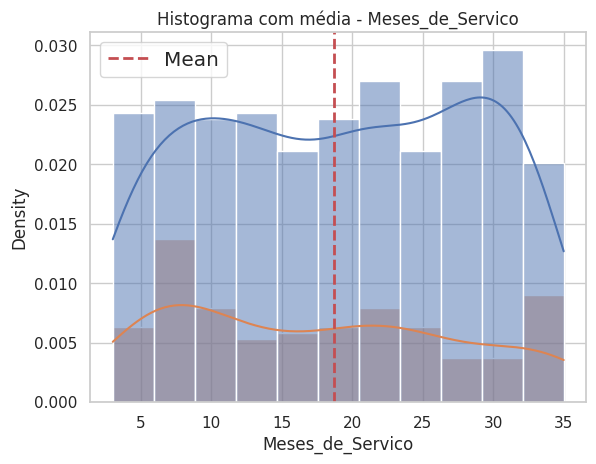

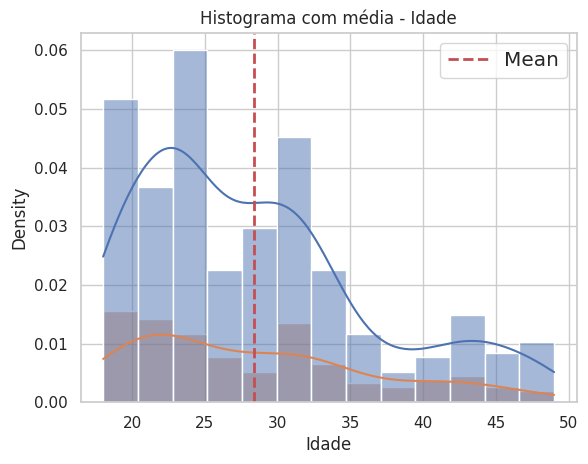

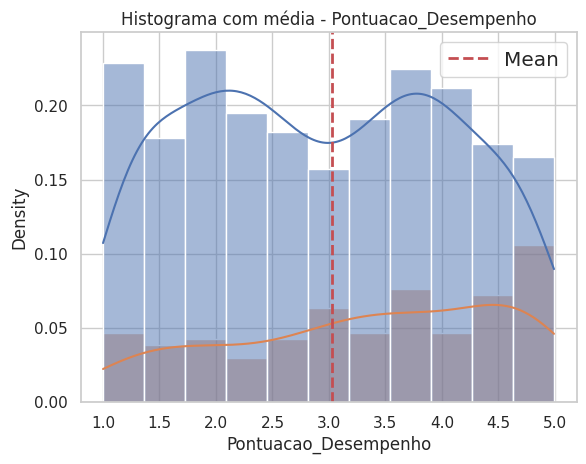

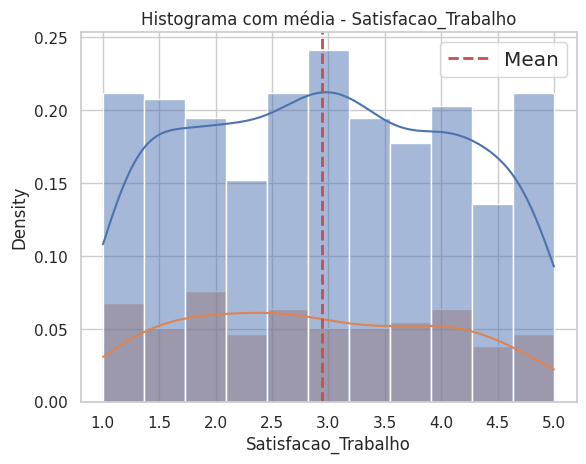

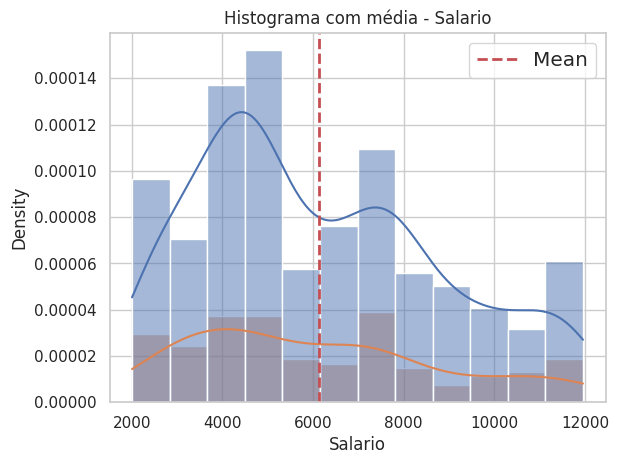

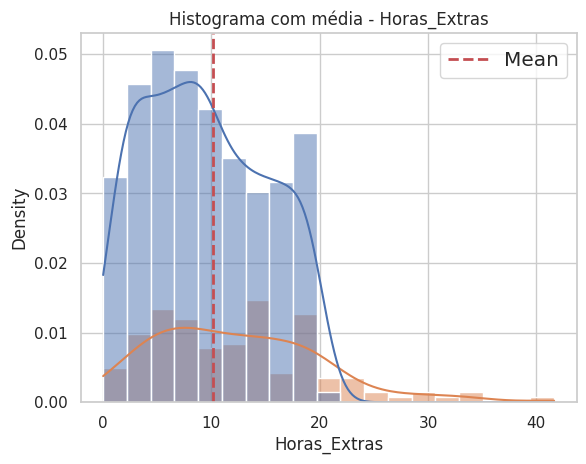

In [ ]:
sns.set(style="whitegrid")

for col in df.drop(columns=['Data_Contratacao','Data_Desligamento','Desligamento','Nivel_Cargo']).columns:

    # Plotando o histograma
    sns.histplot(data=df, x=col, hue='Desligamento', kde=True, stat='density')


    # Adicionando a média como uma linha vertical
    plt.axvline(df[col].mean(), color='r', linestyle='--', linewidth=2, label='Mean')


    # Adicionando título ao gráfico
    plt.title(f'Histograma com média - {col}')

    # Adicionando legenda
    plt.legend(fontsize='large')

    # Exibindo o gráfico
    plt.show()

Existem apenas 213 funcionários com a permanência maior que dois anos.A análise acima fornece alguns insights os motivos do desligamento dos funcionários. Principais pontos levantados:

    

*   Pontuação de Desempenho:Os funcionários desligados tendem a ter uma pontuação de desempenho superior à média, o que sugere que o desligamento não está relacionado ao baixo desempenho. Isso pode indicar que outros fatores estão contribuindo para o desligamento.
*   Satisfação com o Trabalho: A satisfação com o trabalho entre os funcionários desligados também é maior que a média. Isso pode indicar que o desligamento não está diretamente ligado à insatisfação com o trabalho.
*   Salários: É importante considerar que os funcionários com mais tempo de serviço geralmente recebem bônus, como triênio e quinquênio. Portanto, embora não haja uma diferença significativa nos salários entre os funcionários desligados e os que permanecem na empresa, pode haver discrepâncias nos benefícios adicionais oferecidos aos funcionários com mais tempo de serviço, o que pode influenciar nas decisões de desligamento.
*  Horas Extras: Os funcionários desligados tendem a trabalhar uma quantidade significativa de horas extras, o que pode indicar sobrecarga de trabalho. Isso pode ser um motivo para o desligamento, especialmente se não houver compensação adequada pelas horas extras trabalhadas.
*   Tempo de Serviço: Se 82% dos funcionários permanecem na empresa,indicando uma alta retenção.Porém possui uma taxa  de rotatividade de cerca de 17.84% pode ser considerada moderada, indicando que uma parte significativa da força de trabalho está deixando a empresa em um determinado período de tempo. Isso pode sugerir alguns problemas de retenção de talentos ou insatisfação entre os funcionários.

# Conclusão das análises

Buscando entender os motivos que levaram ao desligamento dos funcionários, observamos uma discrepância significativa nos dados entre funcionários ativos e inativos. Portanto, exploramos cada grupo individualmente, analisando as possíveis relações entre as variáveis disponíveis no dataset. A partir dessa análise, conseguimos tirar algumas conclusões:

### **Horas extras**

Foi observado que os funcionários desligados tendem a realizar uma quantidade significativa de horas extras, destacando assim a importância dessa variável nas relações presentes neste dataset. Ao analisar individualmente esta variável, notamos que, em termos gerais, a idade e o salário estão correlacionados com as horas extras. Isso indica que funcionários mais velhos tendem a trabalhar mais horas extras e receberem salários mais altos. No entanto, é provável que esses resultados estejam sendo influenciados por outliers (funcionários fora da curva). Portanto, decidimos separar os funcionários que realizaram um número elevado de horas extras para uma análise mais detalhada.

Observamos que a idade e o salário continuam fortemente relacionados com as horas extras, mas com uma diferença notável: funcionários mais velhos tendem a trabalhar menos horas extras agora. Além disso, as correlações entre os meses de serviço e a pontuação de desempenho aumentaram significativamente.

Notamos que os meses de serviço, a idade e a pontuação de desempenho estão inversamente relacionadas com a quantidade de horas extras trabalhadas.


**Pode haver alguns motivos para isso:**

Quando um funcionário inicia sua jornada na empresa, está se adaptando aos procedimentos internos e aos métodos de trabalho. Como todos os funcionários analisados ocupam cargos de nível sênior, as demandas são naturalmente mais elevadas. Essa fase inicial de adaptação, aliada às crescentes responsabilidades, muitas vezes requer um investimento de tempo adicional, além do horário regular, levando a um aumento no número de horas extras. No entanto, à medida que o funcionário se familiariza e ganha mais experiência com as práticas da empresa, tende a se tornar mais eficiente em suas tarefas, o que resulta em uma redução gradual na necessidade de horas extras e em um aumento em sua pontuação de desempenho.


### **Tempo de empresa**

**Ponto importante notado:**

82% dos funcionários permaneceram na empresa após 2 anos de serviço, refletindo uma forte retenção de colaboradores. Contudo, cerca de 18% dos funcionários deixaram a empresa nesse período, o que representa uma rotatividade significativa, indicando que parte da força de trabalho está se desligando da empresa em um determinado período de tempo. Foi observado que os salários variam consideravelmente ao longo do tempo, com pouca consideração pelo tempo de serviço ou implementação de bonificações, havendo colaboradores com menos tempo de casa recebendo muito mais que alguém com mais tempo. Essa falta de reconhecimento pode ter motivado muitos funcionários a buscar oportunidades de emprego em outras empresas.


### **Mesclando as duas análises**

Observa-se que o tempo de serviço do funcionário na empresa tem uma correlação bastante fraca com o desligamento. No entanto, quando analisado em conjunto com outras variáveis, pode-se observar uma possível relação.

**Funcionários com menos tempo na empresa** tendem a trabalhar mais horas extras, o que pode levá-los a se sentirem sobrecarregados e mal adaptados à empresa, resultando em um desempenho ruim e, eventualmente, na busca por outras oportunidades.

Por outro lado, **funcionários com mais tempo de casa**, devido à baixa variação salarial ao longo do tempo, podem buscar novas oportunidades de emprego. Esta estabilidade salarial pode levar à busca por empresas que ofereçam melhores perspectivas de crescimento profissional e remuneração.


### **Pontos observados:**

**Data de Desligamento:**

- Devido à falta de dados, não podemos tirar conclusões definitivas sobre a data de desligamento dos funcionários.

- Tudo indica que não houve um motivo específico para que todos os funcionários fossem demitidos no mesmo dia.

**Ausência da Informação sobre o Cargo:**

- A ausência de informações sobre o cargo dos funcionários nos impede de avaliar se os salários estavam abaixo da média.

- A falta dessa informação dificulta entender se o salário pode ter levado os funcionários a deixarem a empresa.


####Aplicando modelo de Regressão Logística sem normalização

In [ ]:
df.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


Os dados estão desbalanceados, será testado dessa forma em primeiro momento para checar o resultado do modelo. A regressão logística é muito usada quando o target é binário, como neste exemplo

In [ ]:
df['Desligamento'].value_counts(normalize=True)

Desligamento
0    0.778462
1    0.221538
Name: proportion, dtype: float64

In [ ]:
df_copia=df.copy()

In [ ]:
le = LabelEncoder()
df_copia['nivel_cargo_encoded'] = le.fit_transform(df['Nivel_Cargo'])

In [ ]:
df_copia.head()

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,nivel_cargo_encoded
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0,1
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1,2
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0,2
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0,1
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0,2


In [ ]:
# Separar as features e o target
X = df.drop(columns=['Data_Contratacao','Data_Desligamento','Nivel_Cargo','Desligamento'])
y = df['Desligamento']

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1_000_000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.7692307692307693

Text(0.5, 19.049999999999997, 'Predito')

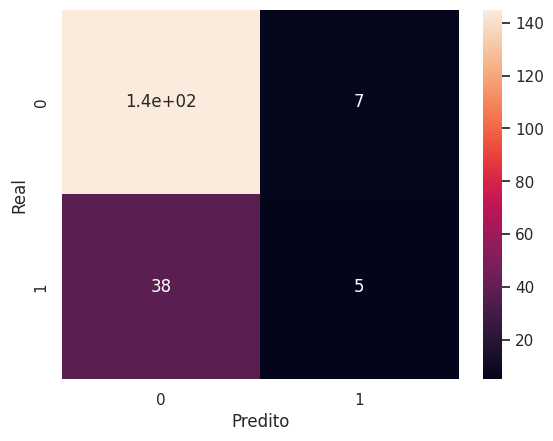

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True)
plt.ylabel('Real')
plt.xlabel('Predito')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.87       152
           1       0.42      0.12      0.18        43

    accuracy                           0.77       195
   macro avg       0.60      0.54      0.52       195
weighted avg       0.71      0.77      0.71       195



###Árvore de decisão




In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
acc1 = accuracy_score(y_test, y_pred1)
acc1

0.7025641025641025

In [ ]:
y_prob1 = model1.predict_proba(X_test)
#y_prob1

Text(0.5, 19.049999999999997, 'Predito')

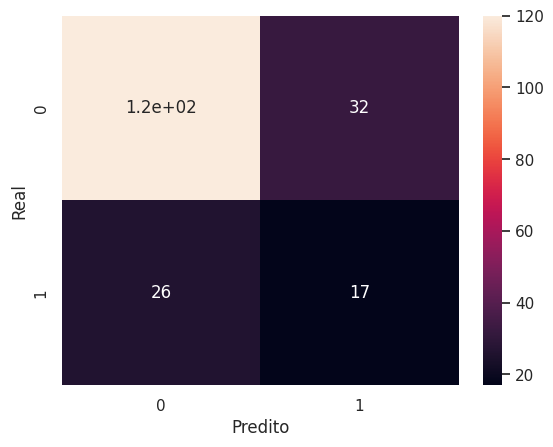

In [ ]:
matrix1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(matrix1, annot=True)
plt.ylabel('Real')
plt.xlabel('Predito')

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       152
           1       0.35      0.40      0.37        43

    accuracy                           0.70       195
   macro avg       0.58      0.59      0.59       195
weighted avg       0.72      0.70      0.71       195



### Usando o **SVM** (**S**upport **V**ector **M**achines)

In [ ]:
# Sem scaler
svc = LinearSVC(max_iter=4000)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Testaremos tanto no conjunto teste quanto no de treinamento, com isso conseguimos ver o desempenho e a capacidade de generalização do modelo

In [ ]:
print("Resultados do Conjunto de Treinamento:\n")
print(classification_report(svc.predict(X_train), y_train))

Resultados do Conjunto de Treinamento:

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       455
           1       0.00      0.00      0.00         0

    accuracy                           0.78       455
   macro avg       0.50      0.39      0.44       455
weighted avg       1.00      0.78      0.88       455



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Resultados do Conjunto de Teste:\n")
print(classification_report(y_pred,y_test))

Resultados do Conjunto de Teste:

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       195
           1       0.00      0.00      0.00         0

    accuracy                           0.78       195
   macro avg       0.50      0.39      0.44       195
weighted avg       1.00      0.78      0.88       195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Analisando os dados sem aplicar o Scaler, notamos que o modelo só consegue prever a classe 0. A alta acurácia é devida à predominância de funcionários ativos no dataset, fazendo com que o modelo acerte mais, mas não da maneira que esperamos.

 Para termos uma análise mais precisa, onde os dados fiquem mais equilibrados e o modelo produza resultados melhores, usaremos o Scaler. Isso porque o Scaler uniformiza a escala das variáveis, garantindo que todas as características contribuam igualmente para a decisão do modelo. Além disso, melhora a convergência do algoritmo, especialmente em métodos sensíveis à escala como o SVM, permitindo uma separação mais eficiente entre as classes e um desempenho mais equilibrado, mesmo em conjuntos de dados desbalanceados.

In [ ]:
# Com scaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svc_scaled = LinearSVC()
svc_scaled.fit(X_train_scaled,y_train)

LinearSVC()

In [ ]:
y_pred_scaled = svc_scaled.predict(X_test_scaled)

In [ ]:
print("Resultados do Conjunto de Treinamento:\n")
print(classification_report(svc_scaled.predict(X_train_scaled), y_train))

Resultados do Conjunto de Treinamento:

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       450
           1       0.05      1.00      0.09         5

    accuracy                           0.79       455
   macro avg       0.52      0.89      0.49       455
weighted avg       0.99      0.79      0.87       455



In [ ]:
print("Resultados do Conjunto de Teste:\n")
print(classification_report(y_test,y_pred_scaled))

Resultados do Conjunto de Teste:

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       152
           1       0.75      0.07      0.13        43

    accuracy                           0.79       195
   macro avg       0.77      0.53      0.50       195
weighted avg       0.78      0.79      0.71       195



O modelo consegue prever ambas as classes, mas ainda tem um desempenho ruim para a classe 1 (funcionários desligados), com recall muito baixo.
No entanto, o desempenho geral é melhor, e o modelo começa a reconhecer a classe 1.

Por termos problemas de desbalanceamento

In [ ]:
svc = LinearSVC(class_weight='balanced')
svc.fit(X_train_scaled, y_train)

y_train_pred = svc.predict(X_train_scaled)
y_test_pred = svc.predict(X_test_scaled)


In [ ]:
print("Resultados do Conjunto de Treinamento:\n")
print(classification_report(y_train, y_train_pred))

Resultados do Conjunto de Treinamento:

              precision    recall  f1-score   support

           0       0.85      0.63      0.72       354
           1       0.32      0.61      0.42       101

    accuracy                           0.63       455
   macro avg       0.59      0.62      0.57       455
weighted avg       0.73      0.63      0.66       455



In [ ]:
print("Resultados do Conjunto de Teste:\n")
print(classification_report(y_test, y_test_pred))

Resultados do Conjunto de Teste:

              precision    recall  f1-score   support

           0       0.81      0.58      0.67       152
           1       0.26      0.51      0.34        43

    accuracy                           0.56       195
   macro avg       0.53      0.55      0.51       195
weighted avg       0.69      0.56      0.60       195



A disparidade entre a acurácia do conjunto de treinamento (63%) e do conjunto de teste (56%) sugere que o modelo está enfrentando desafios na generalização dos dados. Embora o modelo tenha uma performance razoável na previsão dos funcionários ativos, ainda apresenta dificuldades em prever os inativos.

Essa discrepância pode ser explicada pelo desequilíbrio entre as classes ou por características complexas e não lineares nos dados que não foram adequadamente capturadas pelo modelo. O fato de o modelo ter uma acurácia maior na classe majoritária (funcionários ativos) indica que ele está mais inclinado a prever essa classe, o que é comum em situações de desequilíbrio de classe.